# **CVPS20 // Connected-Component Labeling**

*September 15, 2020*

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio
from skimage.filters import threshold_otsu

plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"

---

### Counting Objects in Images: Connected-Component Labeling

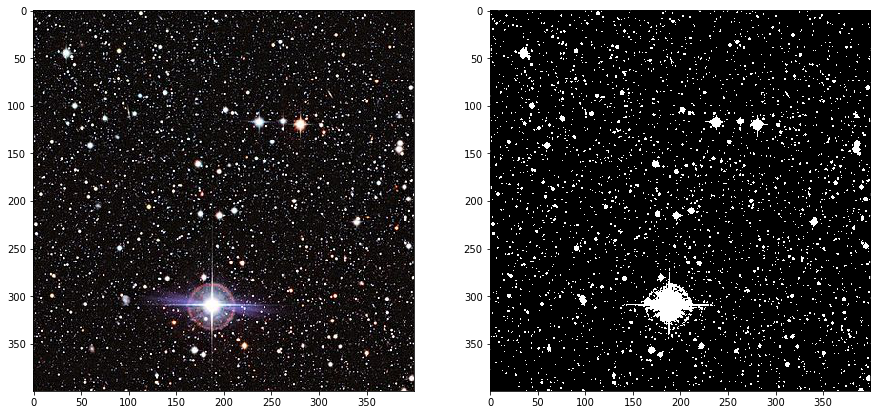

In [2]:
# -- read in the Carina Dwarf Galaxy image
fname = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d7/Carina_Dwarf_Galaxy.jpg/1920px-Carina_Dwarf_Galaxy.jpg"
img = iio.imread(fname) / 255.

# -- extract 3 color channels
red, grn, blu = img.transpose(2, 0, 1)

# -- find a threshold automatically using Otsu's method
othr = threshold_otsu(grn)

# -- show the image using Otsu's threshold
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(img[600:1000, 750:1150])
ax[1].imshow(grn[600:1000, 750:1150] > othr)

fig.show()

Now that we have thresholded this image, how many objects are there?  We can count them using "connected-component labeling",

In [3]:
import scipy.ndimage.measurements as snm

In [4]:
# -- label the thresholded green channel
grn_thr = grn > othr
labs, nlabs = snm.label(grn_thr)

In [5]:
snm.label?

In [6]:
nlabs

20709

Text(0.5, 1.0, 'approximate # of objects: 20709')

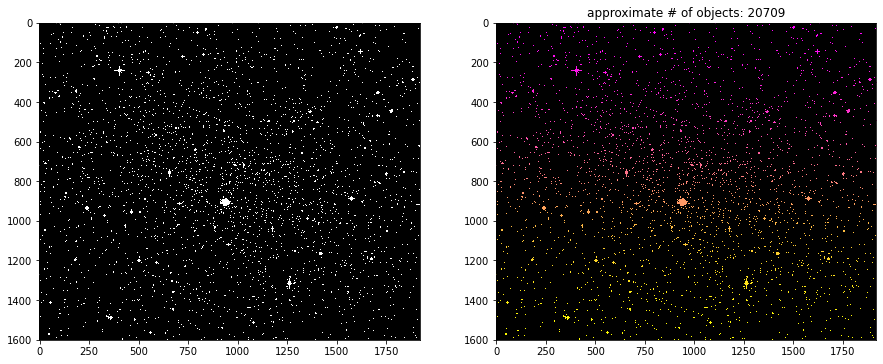

In [8]:
# -- display thresholded image and labels
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(grn_thr)
#grn_thr is true, false, converting to float makes them 1 and 0
#alpha is transparency, made so that 0's are black instead of pink
ax[1].imshow(labs, cmap = 'spring', alpha = grn_thr.astype(float) )

ax[1].set_facecolor('black')
ax[1].set_title('approximate # of objects: {0}'.format(nlabs))

In [11]:
from skimage.data import coins as coin_generator

Let's look at an example with differently sized objects, from `scikit-image`'s example data library,

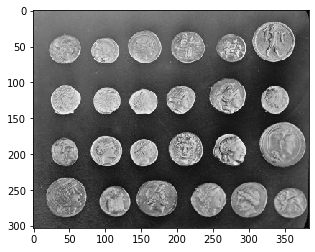

In [17]:
coins = coin_generator() / 255

plt.imshow(coins)

In [ ]:

# -- create coins image
coins = 


Let's try to count the number of coins, just as we did before

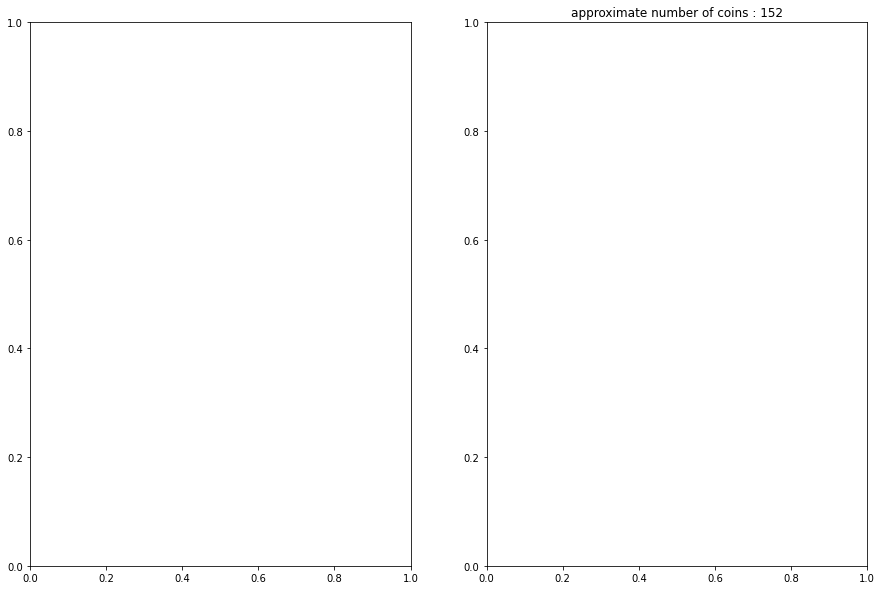

In [18]:
# -- calculate the Otsu threshold for the coins
othr_coins = threshold_otsu(coins)

# -- threshold the coins image
coins_thr =  coins > othr_coins

# -- label the thresholded image
labs, nlabs = snm.label(coins_thr)

# -- display thresholded image and labels
fig, ax = plt.subplots(1, 2, figsize=(15, 10))


ax[1].set_title("approximate number of coins : {0}".format(nlabs))

fig.show()


If we set our threshold higher, we can remove the large artifact at the top of the image:

In [ ]:
# -- set threshold
thr_coins = .6

# -- threshold the coins image
coins_thr = 

# -- label the thresholded image
labs, nlabs = 

# -- display thresholded image and labels
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(coins_thr)
ax[1].imshow(labs, cmap="spring", alpha=coins_thr.astype(float))

ax[1].set_facecolor("black")
ax[1].set_title("approximate number of coins : {0}".format(nlabs))

fig.show()

But now the coins are significantly split apart...

---

### Binary Morphological Operations

Binary morphological operations, modify a binary image based on the distribution of T/F pixels.

Using `binary_erosion` will dissolve the coins a bit:

In [ ]:
# -- set threshold
thr_coins = 0.55

# -- threshold the coins image
coins_thr = coins > thr_coins

# -- erode the binary image
coins_thr = binary_erosion(coins_thr)

# -- label the thresholded image
labs, nlabs = snm.label(coins_thr)

# -- display thresholded image and labels
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(coins_thr)
ax[1].imshow(labs, cmap="spring", alpha=coins_thr.astype(float))

ax[1].set_facecolor("black")
ax[1].set_title("approximate number of coins : {0}".format(nlabs))

fig.show()

However, subsequently dilating them will start to close them again:

In [ ]:
# -- set threshold
thr_coins = 0.55

# -- threshold the coins image
coins_thr = coins > thr_coins

# -- modify the binary image
coins_thr = binary_erosion(coins_thr)
coins_thr = binary_dilation(coins_thr)

# -- label the thresholded image
labs, nlabs = snm.label(coins_thr)

# -- display thresholded image and labels
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(coins_thr)
ax[1].imshow(labs, cmap="spring", alpha=coins_thr.astype(float))

ax[1].set_facecolor("black")
ax[1].set_title("approximate number of coins : {0}".format(nlabs))

fig.show()

"Chaining" binary operations (in coordination with varying threshold values) can clean up the object segmentation and detection:

In [ ]:
# -- set threshold
thr_coins = 0.55

# -- threshold the coins image
coins_thr = coins > thr_coins

# -- modify the binary image


# -- label the thresholded image
labs, nlabs = snm.label(coins_thr)

# -- display thresholded image and labels
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(coins_thr)
ax[1].imshow(labs, cmap="spring", alpha=coins_thr.astype(float))

ax[1].set_facecolor("black")
ax[1].set_title("approximate number of coins : {0}".format(nlabs))

fig.show()